## Coursework 1: Object Recognition
## Student-name: Ummi Aishatu Ibrahim 
## student-number: 940165

In [39]:
## importing the necessary libraries for the project 
import numpy as ny
import matplotlib.pyplot as mat
import tensorflow as tensor
from tensorflow.keras import layers, datasets, models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [40]:
## loading in the necessary datasets using numpy 
## changed the pattern of the image input to work with CNN algorithm better 
## and also printing the shape of the images to confirm whether the transpose function worked
trainImage = ny.load('trnImage.npy')
trainImage = ny.transpose(trainImage, [3,0,1,2])
trainLabel = ny.load('trnLabel.npy')
print(trainImage.shape)
print(trainLabel.shape)

testImage = ny.load('tstImage.npy')
testImage = ny.transpose(testImage, [3,0,1,2])
testLabel = ny.load('tstLabel.npy')
print(testImage.shape)
print(testLabel.shape)

(10000, 32, 32, 3)
(10000, 1)
(1000, 32, 32, 3)
(1000, 1)


In [41]:
## creating a dataset for eaxh training and testing set.
trainDataset = tensor.data.Dataset.from_tensor_slices((trainImage, trainLabel))
testDataset = tensor.data.Dataset.from_tensor_slices((testImage, testLabel))

In [42]:
# splitting the training set to create a validation value for shuffling the data
image, imageValidation, label, labelValidation = train_test_split(trainImage, trainLabel, test_size = 0.2)
#trainImage /= 255
#testImage /= 255

In [49]:
## the start of the CNN algorithm for the obejct recognition
## here i defined model to the Sequential model 
## A Sequential model is appropriate for a plain stack of layers where each layer has exactly 
## one input tensor and one output tensor.
## the feature extraction method is the Convo2D, MaxPooling2D, flatten and Dense functions
## here i am starting to train my data. 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10))

In [50]:
## it summarizes all the CNN functions of the training data set.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               3686912   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 3,692,938
Trainable params: 3,692,938
Non-trainable params: 0
_________________________________________________________________


In [51]:
## the compile methods determines the accuracy and loss of object recognition in the dataset 
## it also fits the training set and testing set as the validation set so it can print out the epoch for the 10 
## CIFAR 10 dataset categories. 
model.compile(optimizer = 'adam',
              loss = tensor.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
history = model.fit(trainImage, trainLabel, epochs = 10, validation_data = (testImage, testLabel))

Epoch 1/10
313/313 [==============================] - 13s 40ms/step - loss: 1.7068 - accuracy: 0.3895 - val_loss: 1.5407 - val_accuracy: 0.4600
Epoch 2/10
313/313 [==============================] - 19s 61ms/step - loss: 1.3434 - accuracy: 0.5273 - val_loss: 1.4154 - val_accuracy: 0.5050
Epoch 3/10
313/313 [==============================] - 13s 43ms/step - loss: 1.1779 - accuracy: 0.5862 - val_loss: 1.3876 - val_accuracy: 0.5200
Epoch 4/10
313/313 [==============================] - 13s 41ms/step - loss: 1.0377 - accuracy: 0.6344 - val_loss: 1.3481 - val_accuracy: 0.5290
Epoch 5/10
313/313 [==============================] - 13s 41ms/step - loss: 0.9201 - accuracy: 0.6780 - val_loss: 1.3497 - val_accuracy: 0.5630
Epoch 6/10
313/313 [==============================] - 13s 42ms/step - loss: 0.7736 - accuracy: 0.7257 - val_loss: 1.3986 - val_accuracy: 0.5430
Epoch 7/10
313/313 [==============================] - 13s 43ms/step - loss: 0.6377 - accuracy: 0.7814 - val_loss: 1.4106 - val_accuracy:

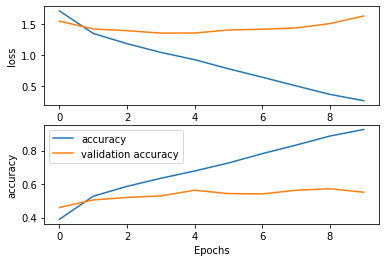

In [52]:
## the plot between epoch and the loss of the dataset 
mat.subplot(211)
mat.plot(history.history['loss'], label='loss')
mat.plot(history.history['val_loss'], label='validation loss')
mat.xlabel('Epochs')
mat.ylabel('loss')

## the plot between epoch and accuracy of the dataset 
mat.subplot(212)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
mat.plot(accuracy, label = 'accuracy')
mat.plot(val_accuracy, label = 'validation accuracy')
mat.xlabel('Epochs')
mat.ylabel('accuracy')
mat.legend()
mat.show()

In [53]:
## this is the evaluation of the testing set for the dataset
## this finalises the whole dataset 
testLoss, testAccuracy = model.evaluate(testImage, testLabel)

32/32 [==============================] - 0s 8ms/step - loss: 1.6239 - accuracy: 0.5510


In [54]:
## printing out the final accuracy for the object recognition 
print(testAccuracy*100)

55.09999990463257


In [55]:
## here i predicted the testing image for we can produce the confusion matrix and classification report of the dataset
## this matrix is an error matrix that allows the perfromance of the object recognition concept.
predict = model.predict(testImage)
y_predict = ny.argmax(predict, axis=1)
target_names = ['airplanes', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

print(classification_report(ny.argmax(testLabel, axis=1), y_predict,target_names=target_names))
print(confusion_matrix(ny.argmax(testLabel, axis=1), y_predict))

              precision    recall  f1-score   support

   airplanes       1.00      0.15      0.26      1000
  automobile       0.00      0.00      0.00         0
        bird       0.00      0.00      0.00         0
         cat       0.00      0.00      0.00         0
        deer       0.00      0.00      0.00         0
         dog       0.00      0.00      0.00         0
        frog       0.00      0.00      0.00         0
       horse       0.00      0.00      0.00         0
        ship       0.00      0.00      0.00         0
       truck       0.00      0.00      0.00         0

    accuracy                           0.15      1000
   macro avg       0.10      0.02      0.03      1000
weighted avg       1.00      0.15      0.26      1000

[[151  87  93  75  78 108  83 141  91  93]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 